In [1]:
import ultralytics
import os

# YOLO 설치 경로 확인
print(ultralytics.__file__)

# models 폴더 위치
yolo_path = os.path.dirname(ultralytics.__file__)
print(f"YAML files might be in: {os.path.join(yolo_path, 'models')}")

C:\Users\limul\.conda\envs\yolo5-8\lib\site-packages\ultralytics\__init__.py
YAML files might be in: C:\Users\limul\.conda\envs\yolo5-8\lib\site-packages\ultralytics\models


In [2]:
# Import Essential Libraries
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Configure the visual appearance of Seaborn plots
sns.set(rc={'axes.facecolor': '#eae8fa'}, style='darkgrid')

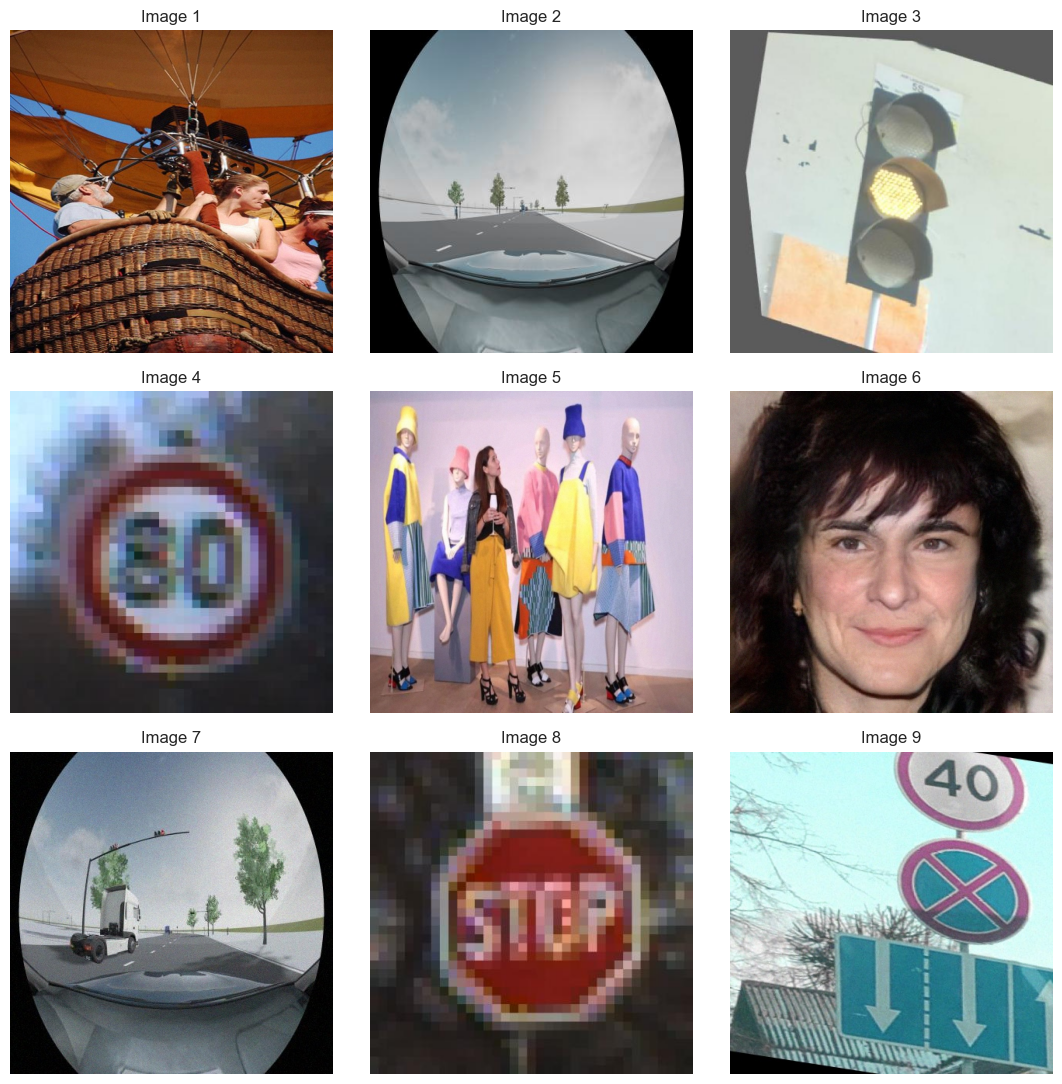

In [4]:
Image_dir = os.getcwd()+'/data/images'

num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [5]:
# Get the size of the image
image = cv2.imread(Image_dir+"/40_sign_00021.jpg")
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 416x416 and 3 channels.


PRO TIP  Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.


image 1/1 C:\Users\limul\Desktop\College\2_grade\2_semester\AI_Project\teamProject\data\images\40_sign_00021.jpg: 640x640 1 clock, 5.0ms
Speed: 2.3ms preprocess, 5.0ms inference, 37.7ms postprocess per image at shape (1, 3, 640, 640)


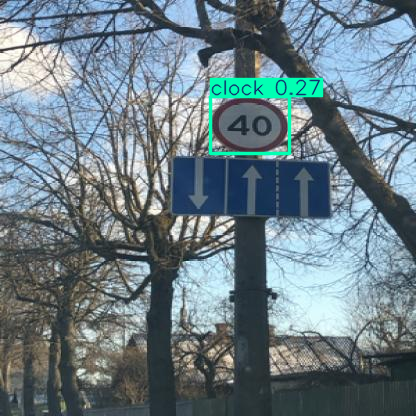

In [6]:
# Use a pretrained YOLOv8n model
model = YOLO('yolov5s.pt')
# torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Use the model to detect object
image = Image_dir+"/40_sign_00021.jpg"
result_predict = model.predict(source = image, imgsz=(640))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [7]:
!pip install --upgrade ultralytics ray

Defaulting to user installation because normal site-packages is not writeable


In [8]:
# Build from YAML and transfer weights
Final_model = YOLO('yolov5s.pt')  

# Training The Final Model
Result_Final_model = Final_model.train(data=os.getcwd()+"/data/data.yaml",epochs = 50, batch = 22, optimizer = 'auto', patience=5)

PRO TIP  Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

Ultralytics 8.3.35  Python-3.9.20 torch-2.1.2+cu118 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: task=detect, mode=train, model=yolov5s.pt, data=C:\Users\limul\Desktop\College\2_grade\2_semester\AI_Project\teamProject/data/data.yaml, epochs=50, time=None, patience=5, batch=22, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, 

2024-12-02 12:51:48,941	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=8

                   from  n    params  module                                       arguments                     
  0                  -1  1      3520  ultralytics.nn.modules.conv.Conv             [3, 32, 6, 2, 2]              
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     18816  ultralytics.nn.modules.block.C3              [64, 64, 1]                   
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    115712  ultralytics.nn.modules.block.C3              [128, 128, 2]                 
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  3    625152  ultralytics.nn.modules.block.C3              [256, 256, 3]                 
  7                  -1  1   1180672  ultralytics

train: Scanning C:\Users\limul\Desktop\College\2_grade\2_semester\AI_Project\teamProject\data\train\l


train: New cache created: C:\Users\limul\Desktop\College\2_grade\2_semester\AI_Project\teamProject\data\train\labels.cache


val: Scanning C:\Users\limul\Desktop\College\2_grade\2_semester\AI_Project\teamProject\data\valid\lab

val: New cache created: C:\Users\limul\Desktop\College\2_grade\2_semester\AI_Project\teamProject\data\valid\labels.cache


Plotting labels to runs\detect\train2\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.000515625), 75 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      5.27G      1.139      1.876      1.352         28        640: 100%|██████████| 559/5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████


                   all        679       1003      0.749      0.674      0.719      0.509

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      5.34G      1.191      1.235      1.378         41        640: 100%|██████████| 559/5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████

                   all        679       1003      0.758      0.638      0.713      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      5.31G      1.202      1.217       1.38         39        640: 100%|██████████| 559/5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████

                   all        679       1003      0.732       0.74      0.801      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      5.33G       1.17       1.13      1.363         40        640: 100%|██████████| 559/5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████

                   all        679       1003      0.812      0.785      0.807      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50       5.3G      1.122      1.043      1.332         33        640: 100%|██████████| 559/5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████

                   all        679       1003      0.884      0.789      0.851      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      5.33G      1.084      0.989      1.301         36        640: 100%|██████████| 559/5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████

                   all        679       1003      0.874       0.82      0.858      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      5.32G      1.053     0.9462      1.281         32        640: 100%|██████████| 559/5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████

                   all        679       1003      0.862      0.832      0.866      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       5.3G      1.029     0.9037      1.263         44        640: 100%|██████████| 559/5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████

                   all        679       1003       0.88      0.831      0.867       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      5.33G      1.016     0.8764      1.256         34        640: 100%|██████████| 559/5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████

                   all        679       1003      0.882      0.829      0.882      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      5.33G     0.9891     0.8379      1.238         43        640: 100%|██████████| 559/5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████

                   all        679       1003      0.908      0.847      0.892      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50       5.3G     0.9744     0.8176      1.229         20        640: 100%|██████████| 559/5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████

                   all        679       1003       0.89      0.845       0.89      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      5.34G     0.9658     0.8012      1.224         24        640: 100%|██████████| 559/5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████

                   all        679       1003       0.91      0.833      0.893       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      5.33G     0.9469      0.778      1.212         25        640: 100%|██████████| 559/5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████

                   all        679       1003      0.894      0.867      0.901      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50       5.3G     0.9332     0.7602      1.202         35        640: 100%|██████████| 559/5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████

                   all        679       1003      0.901       0.85      0.897      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      5.34G     0.9314     0.7485      1.202         32        640: 100%|██████████| 559/5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████

                   all        679       1003      0.919      0.841      0.904      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      5.33G     0.9117     0.7309      1.189         40        640: 100%|██████████| 559/5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████

                   all        679       1003      0.915      0.857      0.905      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50       5.3G     0.9092     0.7244      1.188         27        640: 100%|██████████| 559/5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████

                   all        679       1003      0.915      0.868      0.906      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      5.43G     0.8976     0.7082      1.178         36        640: 100%|██████████| 559/5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████

                   all        679       1003      0.918      0.865       0.91      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      5.32G     0.8753     0.6775      1.163         32        640: 100%|██████████| 559/5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████

                   all        679       1003      0.928      0.872       0.92      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      5.31G     0.8652     0.6689      1.159         33        640: 100%|██████████| 559/5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████

                   all        679       1003       0.93       0.87      0.916      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      5.33G     0.8597     0.6642      1.157         27        640: 100%|██████████| 559/5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████

                   all        679       1003      0.926      0.872      0.917      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      5.33G     0.8427     0.6469      1.149         23        640: 100%|██████████| 559/5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████

                   all        679       1003      0.933       0.87      0.916      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50       5.3G     0.8418     0.6495      1.139         40        640: 100%|██████████| 559/5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████

                   all        679       1003      0.937      0.875      0.919      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      5.34G     0.8293     0.6326      1.139         50        640: 100%|██████████| 559/5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████

                   all        679       1003       0.92      0.883       0.92      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      5.32G     0.8148     0.6155      1.128         34        640: 100%|██████████| 559/5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████

                   all        679       1003      0.923      0.882      0.924      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50       5.3G     0.8138     0.6112       1.13         32        640: 100%|██████████| 559/5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████

                   all        679       1003      0.939      0.874      0.919      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      5.33G     0.7975     0.6114      1.123         37        640: 100%|██████████| 559/5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████

                   all        679       1003      0.931      0.878      0.921       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      5.32G     0.7979     0.6019      1.118         53        640: 100%|██████████| 559/5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████

                   all        679       1003      0.934      0.879      0.925      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50       5.3G     0.7853     0.5839      1.108         34        640: 100%|██████████| 559/5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████

                   all        679       1003      0.935      0.876      0.925      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      5.33G     0.7759     0.5794      1.107         43        640: 100%|██████████| 559/5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████

                   all        679       1003      0.942      0.885      0.928      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      5.32G     0.7649     0.5644        1.1         36        640: 100%|██████████| 559/5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████

                   all        679       1003      0.938      0.884      0.927      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50       5.3G     0.7647     0.5634      1.098         39        640: 100%|██████████| 559/5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████

                   all        679       1003      0.947      0.881      0.926      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      5.33G     0.7508     0.5541      1.088         37        640: 100%|██████████| 559/5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████

                   all        679       1003      0.947      0.884      0.929      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      5.32G     0.7419     0.5495      1.086         30        640: 100%|██████████| 559/5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████

                   all        679       1003       0.94      0.897      0.932      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50       5.3G     0.7456     0.5442      1.088         39        640: 100%|██████████| 559/5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████

                   all        679       1003      0.945       0.89      0.932      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      5.34G     0.7316     0.5375      1.081         24        640: 100%|██████████| 559/5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████

                   all        679       1003      0.949      0.891      0.933      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      5.33G      0.721     0.5254      1.076         25        640: 100%|██████████| 559/5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████

                   all        679       1003       0.95      0.895      0.932      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50       5.3G     0.7146     0.5168      1.071         27        640: 100%|██████████| 559/5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████

                   all        679       1003      0.948      0.895      0.934      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      5.34G     0.7045      0.511      1.063         37        640: 100%|██████████| 559/5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████

                   all        679       1003       0.94      0.898      0.934      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      5.33G     0.6983     0.5027      1.062         29        640: 100%|██████████| 559/5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████

                   all        679       1003      0.964      0.883      0.933      0.788


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50       5.3G     0.6763     0.4426      1.041         14        640: 100%|██████████| 559/5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████

                   all        679       1003      0.948      0.902      0.935      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      5.34G     0.6626     0.4272      1.026         15        640: 100%|██████████| 559/5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████

                   all        679       1003      0.947      0.895      0.933       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      5.32G     0.6491     0.4176      1.023         17        640: 100%|██████████| 559/5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████

                   all        679       1003      0.953      0.893      0.933      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      5.31G     0.6359     0.4068      1.016         15        640: 100%|██████████| 559/5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████

                   all        679       1003      0.962      0.893      0.935      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      5.34G     0.6244     0.4004      1.008         14        640: 100%|██████████| 559/5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████

                   all        679       1003      0.949      0.904      0.934      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      5.33G     0.6138      0.394      1.002         19        640: 100%|██████████| 559/5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████

                   all        679       1003      0.959      0.896      0.933      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50       5.3G      0.604     0.3873     0.9967         15        640: 100%|██████████| 559/5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████

                   all        679       1003      0.941      0.909      0.935        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      5.34G     0.5966      0.382     0.9903         13        640: 100%|██████████| 559/5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████

                   all        679       1003       0.96      0.895      0.936      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      5.32G     0.5891     0.3758     0.9894         15        640: 100%|██████████| 559/5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████

                   all        679       1003      0.947      0.906      0.935      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50       5.3G     0.5779     0.3705     0.9823         19        640: 100%|██████████| 559/5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████

                   all        679       1003      0.948      0.904      0.936      0.807



50 epochs completed in 2.046 hours.
Optimizer stripped from runs\detect\train2\weights\last.pt, 18.5MB
Optimizer stripped from runs\detect\train2\weights\best.pt, 18.5MB

Validating runs\detect\train2\weights\best.pt...
Ultralytics 8.3.35  Python-3.9.20 torch-2.1.2+cu118 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
YOLOv5s summary (fused): 193 layers, 9,114,632 parameters, 0 gradients, 23.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████


                   all        679       1003      0.949      0.904      0.937      0.807
                   red        111        177      0.939       0.78      0.855      0.673
                yellow        103        138      0.918      0.896      0.909      0.787
                 green        109        154      0.966      0.851      0.894      0.708
             stop_sign         68         68      0.974      0.956      0.981       0.91
               40_sign         54         54      0.962      0.942      0.979      0.872
               80_sign         71         71       0.97      0.917      0.937      0.828
            start_sign          5          5      0.917          1      0.995      0.879
                person        194        336      0.941      0.893      0.942      0.799
Speed: 0.2ms preprocess, 3.4ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs\detect\train2
